In [26]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as t
import matplotlib.pyplot as plt
import numpy as np

In [11]:
IMG_SHAPE = (8, 8)
BATCH_SIZE = 100
THREADS = 4
LAYERS = [IMG_SHAPE[0] * IMG_SHAPE[1], 32, 16, 10]
EPOCHS = 11


transform = t.Compose([
    t.Resize(IMG_SHAPE, interpolation=3),
    t.ToTensor()
])
mnist_train = torchvision.datasets.MNIST('./', download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)
data_loader_train = torch.utils.data.DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=THREADS)
data_loader_test = torch.utils.data.DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=THREADS)

In [36]:
class Net(nn.Module):
    def __init__(self, layers):
        super(Net, self).__init__()
        self.layers = layers
        self.n_layers = len(self.layers)
        self.linears = []
        for i in range(self.n_layers-1):
            self.linears.append(nn.Linear(self.layers[i], self.layers[i+1], bias=False))
        self.linears = nn.ModuleList(self.linears)
    
    def forward(self, x):
        # x = (BATCH_SIZE, n_channels (1), W, H)
        x = x.reshape((BATCH_SIZE, -1))
        for layer in self.linears[:-1]:
            x = layer(x)
            threshold_mask = x < 0.25
            x[threshold_mask] = 0
        x = self.linears[-1](x)
        return x
    
#    def make_weights_postive(self):
        

In [37]:
net = Net(LAYERS)

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [39]:
for epoch in range(EPOCHS):

    running_loss = 0.0
    for i, data in enumerate(data_loader_train, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        ##########################
        with torch.no_grad():
            for j, layer in enumerate(net.linears):
                weight = layer.weight
                weight[weight < 0] = 0
                net.linears[j].weight = weight

        running_loss += loss.item()
        if i % 100 == 99:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 

torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 8, 8])
torch.Size([100, 64])
torch.Size([100, 1, 

KeyboardInterrupt: 

In [16]:
right_answers = []
for i, data in enumerate(data_loader_test, 0):
    inputs, labels = data
    output = net(inputs)
    predictions = torch.argmax(output, dim=1)
    right_answers_mask = predictions == labels
    n_right_answers = predictions[right_answers_mask].shape[0]
    right_answers.append(n_right_answers)

sum(right_answers) / len(mnist_test)

0.8786

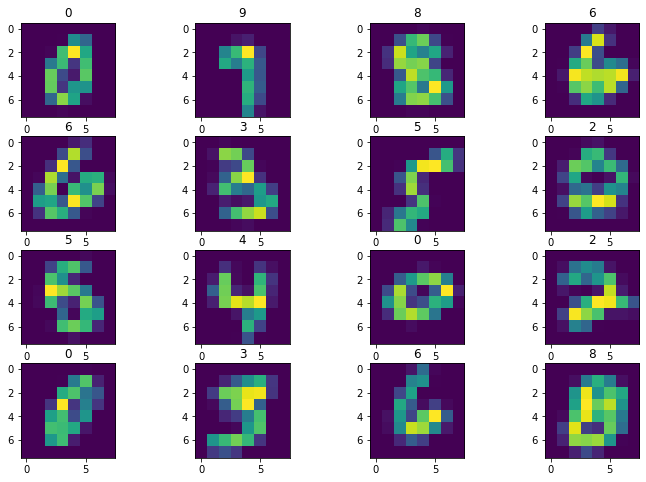

In [17]:
imgs = inputs.numpy()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(imgs[4*i+j][0])
        ax[i, j].set_title(int(labels[4*i+j]))

In [18]:
for i in list(net.parameters()):
    print((i >= 0).all())

tensor(True)
tensor(True)
tensor(True)


In [28]:
for key in net.state_dict().keys():
    weight = net.state_dict()[key]
    np_weight = weight.numpy()
    np.save('{}.np'.format(key), np_weight)